# PROYECTO FINAL

## 1 Plan de Trabajo

Cliente: INTERCONNECT

Planteamiento: La operadora de telecuminaciones quiere pronosticar la tasa de cancelaciones por parte de sus clientes para así poder aplicar estrategias "loyalty", con el objetivo de retener a los clientes activos por medio de promociones y/o descuentos especiales.

Servicios Interconect:
    * Telefono Fijo
    * Internet

Servicios Extra: 4

Datos disponibles:

- `contract.csv` — información del contrato;
- `personal.csv` — datos personales del cliente;
- `internet.csv` — información sobre los servicios de Internet;
- `phone.csv` — información sobre los servicios telefónicos.

## 2 Inicializacion

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def explore(ruta):
    """
    Lee un CSV desde la ruta indicada, imprime la info del DataFrame
    y cuántas filas duplicadas hay, y devuelve el DataFrame.
    """
    try:
        df = pd.read_csv(ruta)
    except FileNotFoundError:
        print(f"Error: no se encontró el archivo en '{ruta}'")
        return None
        
    df.info()
    print()
    print(df.head(5))
    print(f"Filas duplicadas: {df.duplicated().sum()}\n")
    na_counts = df.isna().sum()
    na_percent = (na_counts / len(df)) * 100
    print(pd.DataFrame({"nulos": na_counts, "porcentaje(%)": na_percent}).sort_values("porcentaje(%)", ascending=False))


    return df


In [14]:
#Exploración Inicial
df_contract = explore('/datasets/final_provider/contract.csv')
df_contract.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB

   customerID   BeginDate              EndDate            Type  \
0  7590-VHVEG  2020-01-01                   No  Month-to-month   
1  5575-GNVDE  2017-04-01                   No        One year   
2  3668-QPYBK  2019-10-01  2019-12-01 00:00:00  Month-to-month   
3  7795-CFOCW  2016-05-01                   No        One year   
4  9237-HQITU  2019-09-01  2019-11-01 0

,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


In [15]:
df_contract['BeginDate'] = pd.to_datetime(df_contract['BeginDate'])
df_contract["EndDate"] = df_contract["EndDate"].replace({"No": pd.NA, "": pd.NA})
df_contract["EndDate"] = pd.to_datetime(df_contract["EndDate"])
df_contract["TotalCharges"] = pd.to_numeric(df_contract["TotalCharges"], errors="coerce")
df_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           1869 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
dtypes: datetime64[ns](2), float64(2), object(4)
memory usage: 440.3+ KB


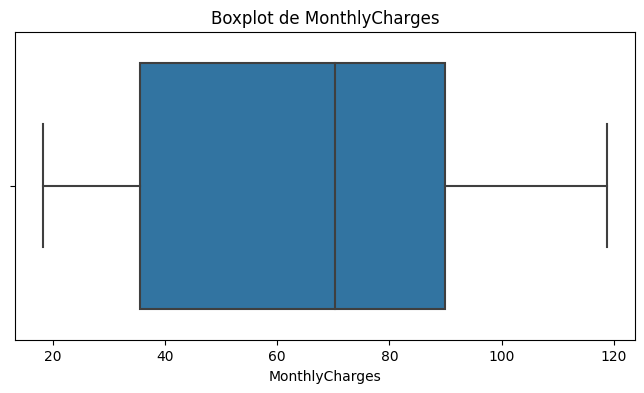

In [23]:
#Boxplot de Monthly Charges
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_contract["MonthlyCharges"])
plt.title("Boxplot de MonthlyCharges")
plt.xlabel("MonthlyCharges")
plt.show()

Comentarios:

Tenemos valores de Fechas que estan como objeto, debido a la naturaleza del proyecto debemos convertirlas a datetime puesto que más adelante manipularemos estos datos y necesitamos que tengan un dtype correcto.

Despues de hacer las correccions basicas de dtype observamos que existen varios valores nulos, estos son de gran ayuda porque nos dan información valiosa, por ejemplo la EndDate posee varios NAT eso nos dice que todavia tenemos muchos más clientes activos que inactivos en este df.

Por otro lado tenemos 2 columnas que hablan de los cargos realizados, y aunque el valor minimo de Monthly charges es $18, la columna de totales contiene valores nulos lo cual puede significar un error, no es de urgencia debido a que solo son 11 filas de nuestro extenso dataset

El boxplot nos indica los quartiles y esta informaión es relevante porque podemos observas que nuestros datos contienen outliers que en el futuro podrian alterar el entrenamiento para predecir la tasa de churn 

In [16]:
df_personal = explore('/datasets/final_provider/personal.csv')
df_personal.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB

   customerID  gender  SeniorCitizen Partner Dependents
0  7590-VHVEG  Female              0     Yes         No
1  5575-GNVDE    Male              0      No         No
2  3668-QPYBK    Male              0      No         No
3  7795-CFOCW    Male              0      No         No
4  9237-HQITU  Female              0      No         No
Filas duplicadas: 0

               nulos  porcentaje(%)
customerID         0            0.0
gender             0            0.0
SeniorCitizen      0            0.0
Partner            0            0.0
Dep

,SeniorCitizen
count,7043.000000
mean,0.162147
std,0.368612
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


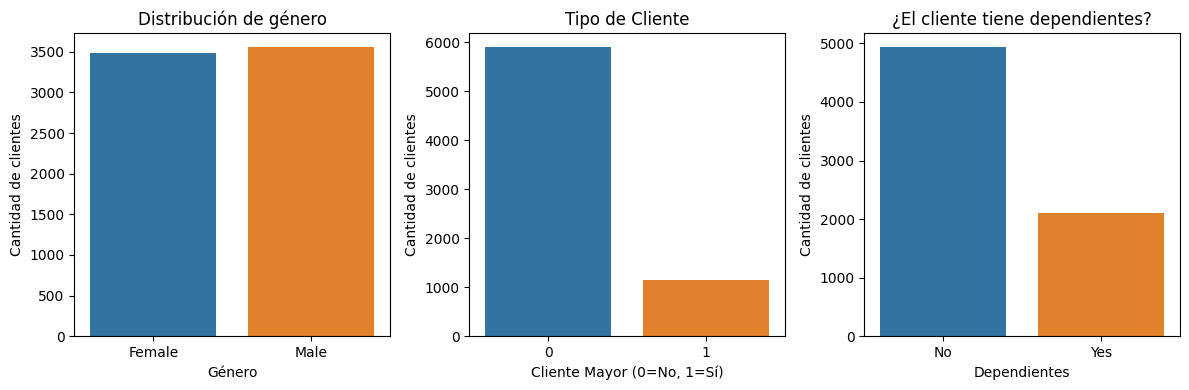

In [32]:
#Graficos de los demograficos
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

#Distribución de género
sns.countplot(x="gender", data=df_personal, ax=axes[0])
axes[0].set_title("Distribución de género")
axes[0].set_xlabel("Género")
axes[0].set_ylabel("Cantidad de clientes")

#Tipo de Cliente
sns.countplot(x="SeniorCitizen", data=df_personal, ax=axes[1])
axes[1].set_title("Tipo de Cliente")
axes[1].set_xlabel("Cliente Mayor (0=No, 1=Sí)")
axes[1].set_ylabel("Cantidad de clientes")

#¿El cliente tiene dependientes?
sns.countplot(x="Dependents", data=df_personal, ax=axes[2])
axes[2].set_title("¿El cliente tiene dependientes?")
axes[2].set_xlabel("Dependientes")
axes[2].set_ylabel("Cantidad de clientes")

plt.tight_layout()
plt.show()

In [17]:
df_internet = explore('/datasets/final_provider/internet.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB

   customerID InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0  7590-VHVEG             DSL             No          Yes               No   
1  5575-GNVDE             DSL            Yes           No              Yes   
2  3668-QPYBK             DSL            Yes          Yes               No   
3  7795-CFOCW             DSL            Yes           No              Yes   
4

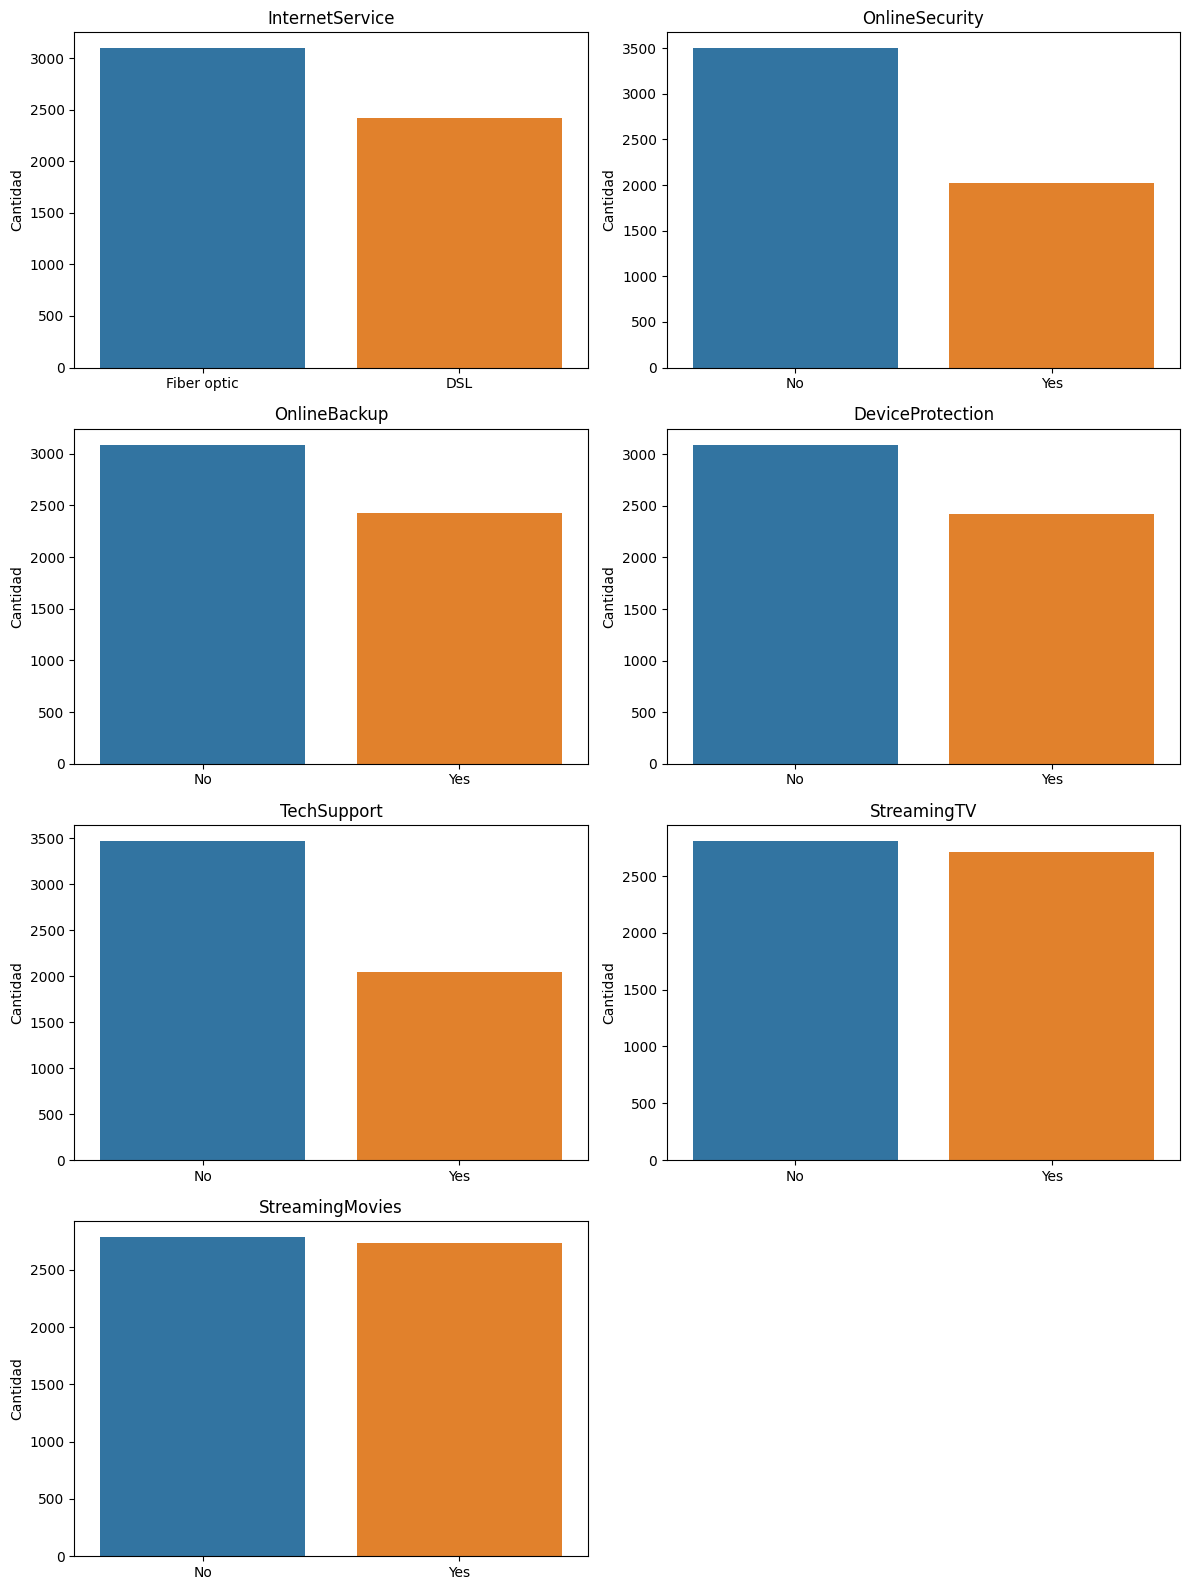

In [35]:
cols = [
    "InternetService",
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies"
]

# Creamos una figura con 4 filas y 2 columnas
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 16))

# Aplanamos la matriz de axes para iterar más fácilmente
axes = axes.flatten()

for idx, col in enumerate(cols):
    ax = axes[idx]
    sns.countplot(x=col, data=df_internet, ax=ax,
                  order=df_internet[col].value_counts().index)
    ax.set_title(f"{col}")
    ax.set_xlabel("")            # Quitamos etiqueta para no repetir el nombre
    ax.set_ylabel("Cantidad")    # Etiqueta común para todos
    # Si la categoría es “Yes/No”, rotamos menos
    if df_internet[col].nunique() > 2:
        ax.tick_params(axis="x", rotation=45)

# Quitamos el eje sobrante (última ranura) si hay un espacio libre
if len(cols) < len(axes):
    for j in range(len(cols), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [18]:
df_phone = explore('/datasets/final_provider/phone.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB

   customerID MultipleLines
0  5575-GNVDE            No
1  3668-QPYBK            No
2  9237-HQITU            No
3  9305-CDSKC           Yes
4  1452-KIOVK           Yes
Filas duplicadas: 0

               nulos  porcentaje(%)
customerID         0            0.0
MultipleLines      0            0.0


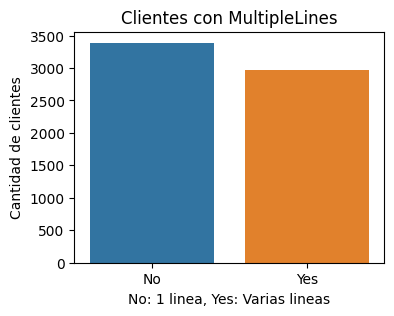

In [36]:
#Graficaremos los demograficos de nuestro publico
plt.figure(figsize=(4, 3))
sns.countplot(x="MultipleLines", data=df_phone) 
plt.title("Clientes con MultipleLines")
plt.xlabel("No: 1 linea, Yes: Varias lineas")
plt.ylabel("Cantidad de clientes")
plt.show()


Conclusiones de EDA:

Los datos de los 4 datasets estan ligados por un customerID lo cual facilitara hacer un merge, ademas los datos en su mayoria se encuentran muy bien balanceados lo cual nos ayudara a tener un modelo que sea capaz de detectar los churn, el recall será una metrica importante y tener los datos equilibrados nos podrá ayudar a detectar la mayor cantidad de clientes que estan próximos a irse.

¿Cuanto gastan los clientes que han decidido abandonar a la compañia?
¿Cuantos servicios son los contratados por un cliente promedio?
¿Quienes son los clientes que mayormente cancelan su plan? (Demográficos: Sexo, Edad)
¿Que planes sufren mas cancelaciones?